<a href="https://www.kaggle.com/code/dianageorgianadrguin/spaceship?scriptVersionId=122033585" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


In [2]:
import seaborn as sns
train_data = pd.read_csv("/kaggle/input/spaceship-titanic/train.csv")
train_data.head()


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
test_data = pd.read_csv("/kaggle/input/spaceship-titanic/test.csv")
copy_test = test_data.copy()
test_data.head()

#corr.shape


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [4]:
len(train_data), len(train_data.dropna())

(8693, 6606)

In [5]:
from sklearn.impute import SimpleImputer
# Loop through each column in the DataFrame
#Data imputation - optimisation




# define the imputation strategies for each column
imputer_numeric = SimpleImputer(strategy='mean')
imputer_categorical = SimpleImputer(strategy='most_frequent')


# fit and transform the imputers on the DataFrame
for col in train_data.columns:
    if train_data[col].dtype == object:
        imputer_categorical.fit(train_data[[col]])
        train_data[[col]] =  imputer_categorical.transform(train_data[[col]])
        #imputed_train_data[col] = pd.DataFrame(imputer_categorical.fit_transform(train_data[col]))
    elif train_data[col].dtype != bool :
        imputer_numeric.fit(train_data[[col]])
        train_data[[col]] =  imputer_numeric.transform(train_data[[col]])
        #imputed_train_data[col] = pd.DataFrame(imputer_numeric.fit_transform(train_data[col]))

for col in test_data.columns:
    if test_data[col].dtype == object:
        imputer_categorical.fit(test_data[[col]])
        test_data[[col]] =  imputer_categorical.transform(test_data[[col]])
        #imputed_train_data[col] = pd.DataFrame(imputer_categorical.fit_transform(train_data[col]))
    elif test_data[col].dtype != bool :
        imputer_numeric.fit(test_data[[col]])
        test_data[[col]] =  imputer_numeric.transform(test_data[[col]])
        #imputed_train_data[col] = pd.DataFrame(imputer_numeric.fit_transform(train_data[col]))



# check the data types of the columns after imputation
print(train_data.dtypes)
train_data.head()

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [6]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for col in train_data.columns:
    if train_data[col].dtype == 'object':
        train_data[col] = label_encoder.fit_transform(train_data[col])

for col in test_data.columns:
    if test_data[col].dtype == 'object':
        test_data[col] = label_encoder.fit_transform(test_data[col])

print(train_data.dtypes)

PassengerId       int64
HomePlanet        int64
CryoSleep         int64
Cabin             int64
Destination       int64
Age             float64
VIP               int64
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name              int64
Transported        bool
dtype: object


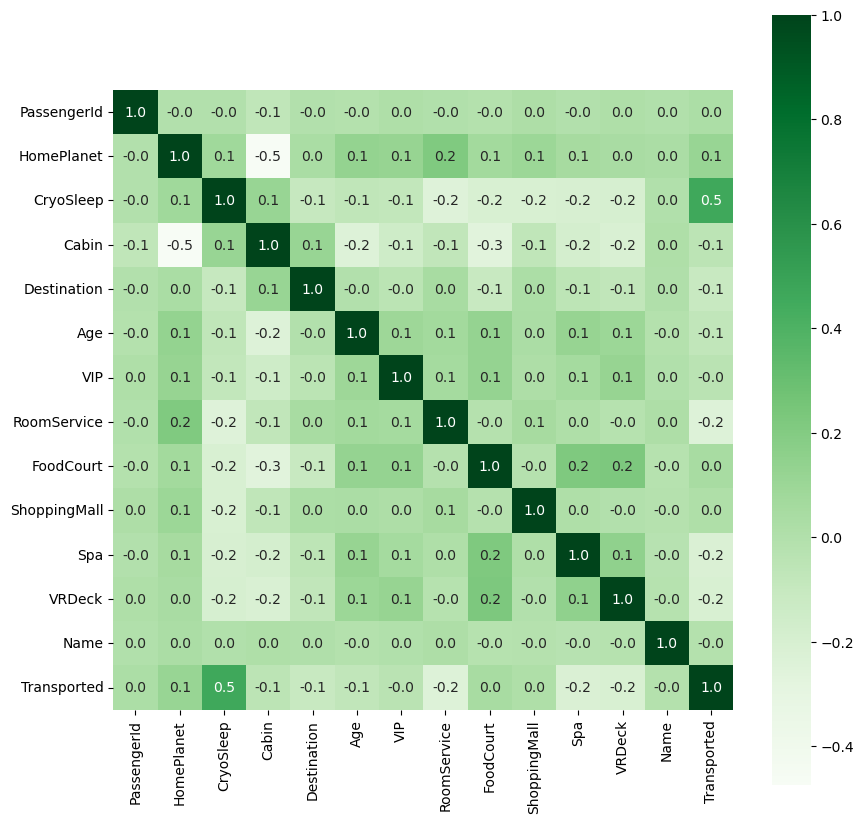

In [7]:
from matplotlib import pyplot
#Plotting the heatmap of correlation between features
corr = train_data.corr()
pyplot.figure(figsize=(10,10))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':10}, cmap='Greens')
pyplot.show()

In [8]:
from sklearn.feature_selection import mutual_info_classif
#To determine the mutual information between the features and the target, we can use a measure called mutual information score. This measure estimates the amount of information that a feature provides about the target variable. A higher mutual information score implies a stronger relationship between the feature and the target.
Xm = train_data.drop('Transported', axis=1) # features
ym = train_data['Transported'] # target variable



# calculate mutual information between each feature and target variable
mi_scores = mutual_info_classif(Xm, ym, discrete_features='auto', random_state=42)

# create a dictionary of feature names and their corresponding mutual information scores
mi_dict = dict(zip(Xm.columns, mi_scores))

# sort features in descending order of their mutual information scores
sorted_mi_dict = dict(sorted(mi_dict.items(), key=lambda x: x[1], reverse=True))

# print the sorted list of features and their mutual information scores
for feature, mi_score in sorted_mi_dict.items():
    print(f'{feature}: {mi_score}')

CryoSleep: 0.10836085269225038
RoomService: 0.0733192154760558
Spa: 0.07093737705853043
VRDeck: 0.05687538293022176
FoodCourt: 0.0436580843402512
ShoppingMall: 0.04289156567501973
Cabin: 0.028449961766322973
Name: 0.024658929454407508
HomePlanet: 0.020928597748648414
PassengerId: 0.01729359141530229
Age: 0.009112904422269752
VIP: 0.004412430374169274
Destination: 0.002385390856307401


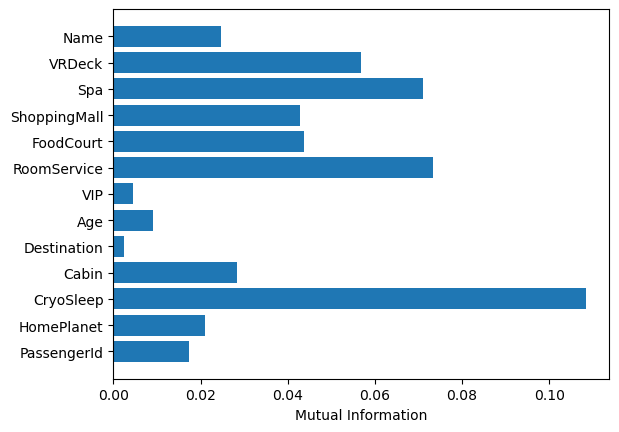

In [9]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.barh(range(len(mi_scores)), mi_scores)
ax.set_yticks(range(len(mi_scores)))
ax.set_yticklabels(Xm.columns)
ax.set_xlabel('Mutual Information')
plt.show()

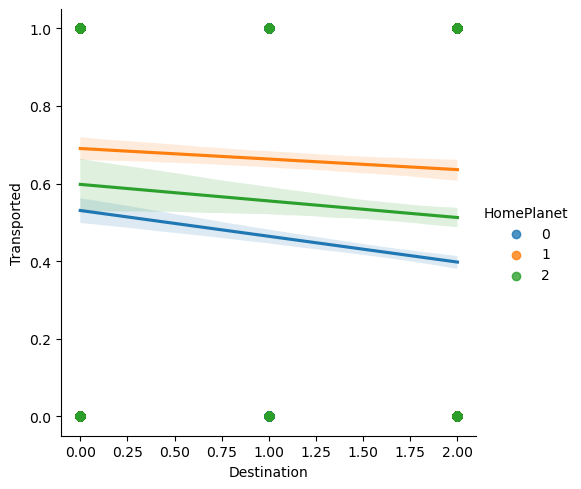

In [10]:
import seaborn as sns
sns.lmplot(x="Destination", y="Transported", hue="HomePlanet", data=train_data);


In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
y = train_data["Transported"].astype(bool)


# Create random forest model
#y = train_data["Transported"]


features = ["PassengerId","HomePlanet","CryoSleep","Cabin","RoomService","FoodCourt","ShoppingMall","Spa","VRDeck","Name"]
X = train_data[features]


X_test =  test_data[features]
 #Train model
model = RandomForestClassifier()

parameters = {'n_estimators': [100,150], 
              'max_features': [ 'auto','log2', 'sqrt'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [ 5,10,30], 
              'min_samples_split': [2,4],
              'min_samples_leaf': [1,2,3]
             }

# Hyperparameter Optimization

grid_obj = GridSearchCV(model, parameters)
grid_obj = grid_obj.fit(X, y)
model_optim = grid_obj.best_estimator_


model_optim.fit(X,y)
predictions = model_optim.predict(X_test)


output = pd.DataFrame({'PassengerId': copy_test.PassengerId, 'Transported': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")
output.head()


Your submission was successfully saved!


,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False
